####  Insurance Charge Prediction
In this project, I will explore the relationship between insurance charges charged by insurance company and the characteristics that determine the charging rate. I will later build a model to help the company determine the appropriate charges for those applying for insurance based on previous data. 

In [1]:
# Import all necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Preliminary Data Wrangling

In [2]:
# Read data to dataframe.

df = pd.read_csv("insurance.csv")

In [3]:
# Number of rows and columns.

df.shape

(1338, 7)

In [4]:
# Show dataset information.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# First five rows.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Note:
Since the data seems to be clean, We will move to data exploration.

# Data Exploration

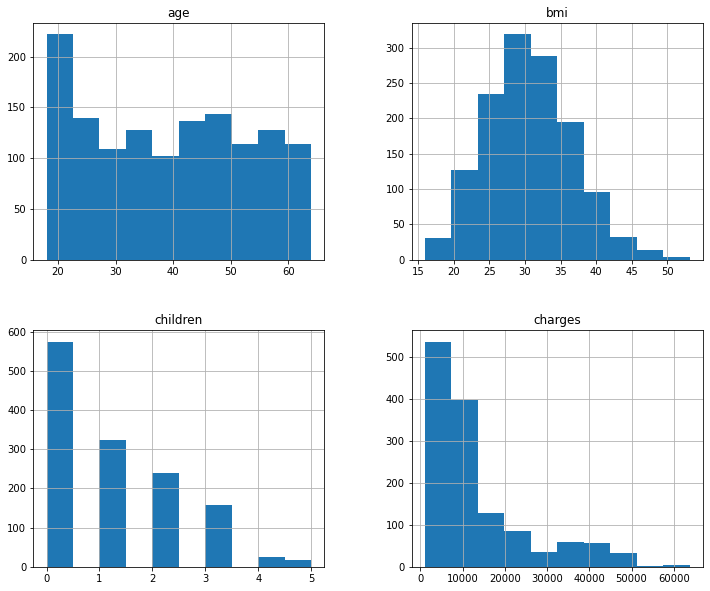

In [6]:
# Histogram distribution of numeric data.

df.hist(figsize=(12,10));

### Observation:
#### Age:
The age distribution shows that most of the people in the datset are between 20 and 25 years of age.
#### Bmi:
The bmi of the insured are normally distributed from 15kg/m2 to around 55kg/m2. However, since a bmi of 30kg/m2 and above implies obesity. It is safe to say that most of the people in the dataset are obese.
#### Children:
The children distribution is euaivalent to a bar chart visualisation of the the number of appearances. 
From the histogram, we can see that most of the people that took insuarance has no children And only About 25 people had 40 to 5 children. 
#### Charges:
The histogram distribution of charges is positively skewed. This implies that only few number of the people pay high insurance charges.  They pay as high as 65,000USD. However, most of the people pay between 1,200USD and and  20,000USD.


Now that we have explored the frequency of the numeric data, we will move to explore the frequency of the categorical data.

In [7]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [8]:
# Bar chart color
base_color = sns.color_palette()[0]

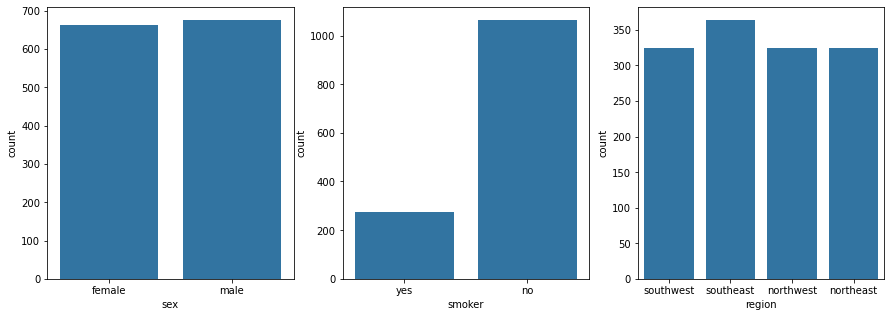

In [9]:
count_col = ["sex", "smoker", "region"]
plt.figure(figsize=(15,5))
for i, col in enumerate(count_col):
    plt.subplot(1,3, i+1)
    g = sns.countplot(
        data=df,
        x= col,
        color=base_color
        
    )
    
    

### Observation:
#### Female:
The bar chart shows that the number of males are a little more than the number of females. But, the difference is insignificant.
#### Smoker:
The bar chart shows that most of theose that applied for insurance are not smoker. Only few percentage of the people are smokers.
#### Region: 
From the region bar chart, we can see that most of the people lives in the south eastern part of United State. The remaining people appears to be uniformly live in the southwest, northwest and northeast region of United State.

Now we can move to bivariate analysis where we will find insight from the relationship between two variables.
We start by looking out for associations between numerical variables.


## Bivairiate Analysis

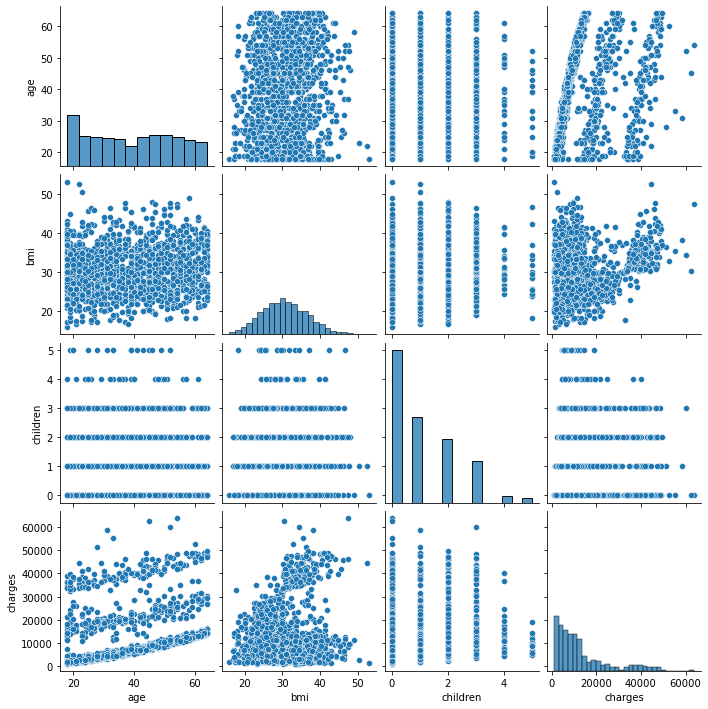

In [10]:
# Scatterplot showing the association between numerical variables.
sns.pairplot(df)

### Observation:
This variables seem to be linearly correlated although their correlations appears to be weak. 

Let's take a precise look at their correlation by plotting a heatmap that shows the correlation of all numerical variables.



<AxesSubplot:>

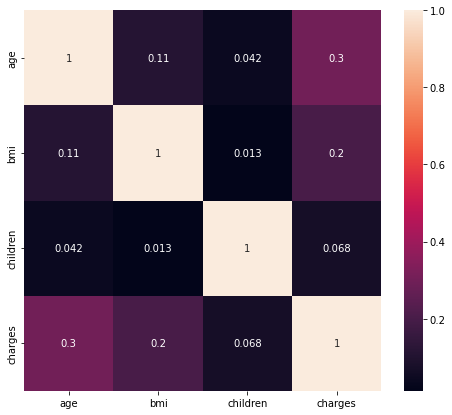

In [11]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True)

### Observation:
The heatmap confirms the results of the scatterplot that the linear correlations between the numerical variables are weak.

Now, we will move to finding insight from the relationship between the categorical data and the numerical data.

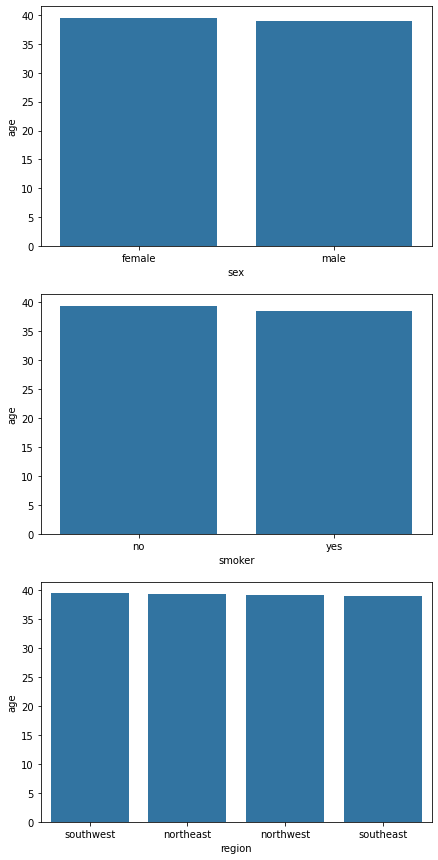

In [12]:
# Bar chart showing the age of both genders.
count_col = ["sex", "smoker", "region"]
plt.figure(figsize=(7,15))
for i, col in enumerate(count_col):
    plt.subplot(3,1, i+1)
    g = sns.barplot(
        data=df,
        x= col,
        y="age",
        ci=False,
        order = df.groupby(col).mean()["age"].sort_values(ascending=False).index,
        color=base_color
    )

###  Observation
The age of both genders appear to be similar on average but the females are slightly older than the males. Similarly non smoker are slightly older than smokers. No significant difference for the region.
On average, both genders are about 40 years of age.
In general, we can imply that there is no significant difference in the age of the people according to their gender, where they live and whether they are smokers or not.

Next, we  we will explore the average amount of money the people were charged according to their gender and the region they live. We shall also see how smokers and non smokers were charged.

In [13]:
df.groupby("sex").mean()["charges"].sort_values(ascending=False).index

Index(['male', 'female'], dtype='object', name='sex')

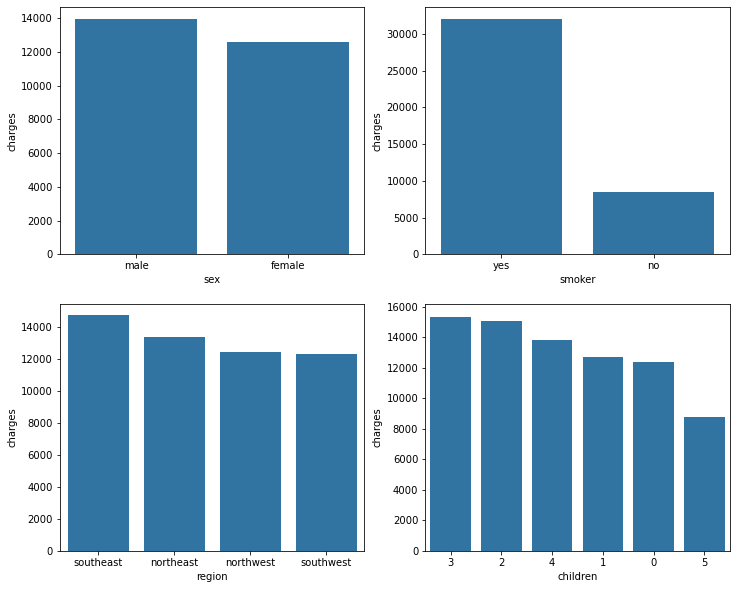

In [14]:
count_col = ["sex", "smoker", "region", "children"]
plt.figure(figsize=(12,10))
for i, col in enumerate(count_col):
    plt.subplot(2,2, i+1)
    g = sns.barplot(
        data=df,
        x= col,
        y="charges",
        ci=False,
        order = df.groupby(col).mean()["charges"].sort_values(ascending=False).index,
        color=base_color
    )

### Observation:
#### Gender vs Charges: 
It appears the male slightly pay more than the female. This is not to proove that there is a gender discrimination. There may be other factor that brought about the differences in charges.
#### Smoker vs charges:
Previously, we see that the non smokers are the most people in the dataset. It is interesting to now see from the bar chart that they are charged less. Non-smokers are charged around 7000USD on average compared to smokers awho were heavily charged about 35,000USD on average. Perhaps smokers are charged more because they have high health risk compared to non-smokers.

#### Region vs Charges:
People from south east are charged more. They are charged 14,200USD on averge while those from southwest are charged the least. Overall, the bar chart also shows that those that live in the eastern part of United State are charged more than those that live in the western part.

#### Children vs Charges:
Those with three children are charged the most followed by those with two children. 
Those with five children are charged the least followed by those without children. 
Can't tell at the moment the reason for this anomaly.

Next, we will move to multivairate analysis where we will go deep further to find insight from three or more variables.

## Multivairate Analysis

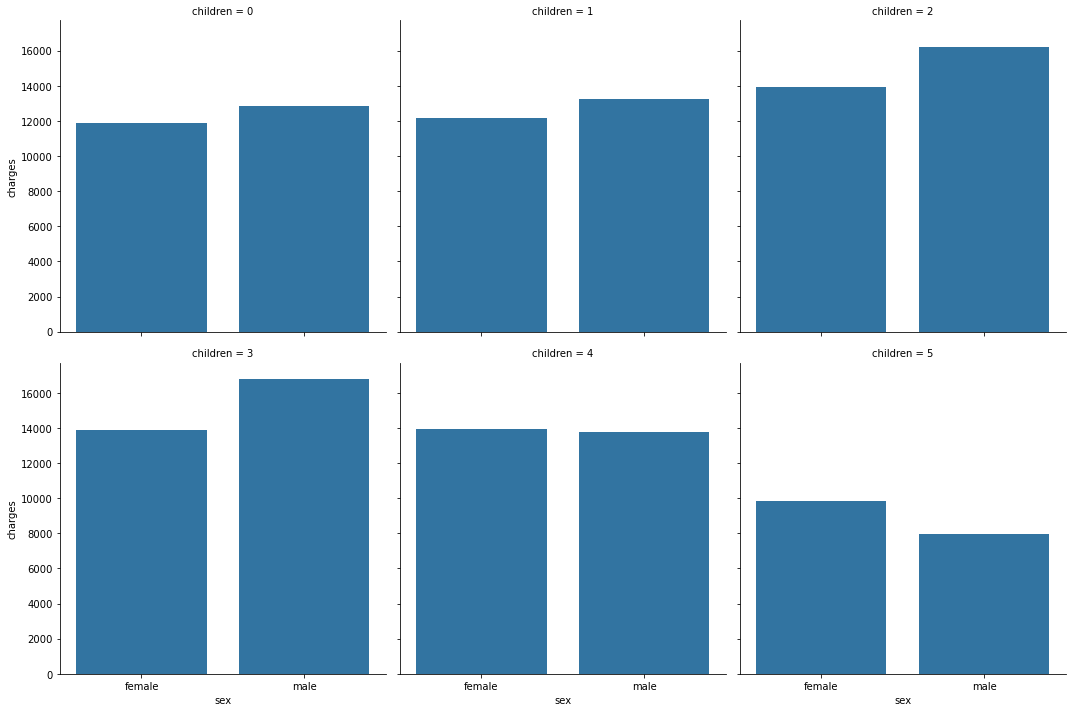

In [15]:
# Bar chart showing how both genders were charged according to the number of children they have.
sns.catplot(
    data=df, 
    x="sex", 
    y="charges", 
    col="children",
    #hue= "smoker", 
    kind="bar",
    color=base_color,
    col_wrap=3, 
    ci=0

)

### Observation:

The chart above confirms our previous findings  that people with three and two children are charged the most while those with five children are charged the least.

At this point, we will be taking a break from exploration. We will now move to making prediction. In the next section, we will build a model that will predict insurance charges for people that will apply for insurance in the future.

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Split
In this section, we will be splitting our data into feature matrix and target vector.

The feature matrix will be serve as our predictor variables while the target vector will serve as  the variable to be predicted.

In [17]:
# Split data into feature matrix and target variable.
 
target = "charges"
X =  df.drop(columns=target)
y = df[target]

In [18]:
# Convert the categorical data to binary format.

ohe = OneHotEncoder(use_cat_names=True)
X = ohe.fit_transform(X)
X.head()

,age,sex_female,sex_male,bmi,children,smoker_yes,smoker_no,region_southwest,region_southeast,region_northwest,region_northeast
0,19,1,0,27.900,0,1,0,1,0,0,0
1,18,0,1,33.770,1,0,1,0,1,0,0
2,28,0,1,33.000,3,0,1,0,1,0,0
3,33,0,1,22.705,0,0,1,0,0,1,0
4,32,0,1,28.880,0,0,1,0,0,1,0


### Note:
Next, we will divide our feature matrix and target vector into two sets: training and test data. We will randomly attribute 80 percent portion of the data to the training set. The training data will be used to build the model and the remaining 20 percent will be used to evaluate our model performance.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
len(X_train) == len(y_train), len(X_test) == len(y_test)

(True, True)

# Build Model
## Baseline

In this section, we will determine our baseline. The baseline will be used to evaluate our model performance.
If our model performance value for the test data is higher than the baseline, there is a problem but if we beat the baseline: our model performance value is lower than the baseline, the model passed.

In [21]:
# Finding thr mean and baseline.

mean = y_train.mean()
baseline = len(y_train)* [mean]


In [22]:
# Mean absolute error of the baseline
mae_baseline = mean_absolute_error(y_train, baseline)
mae_baseline.round(2)

9000.56

## Build
In this section, we will build a linear regression model by using all the variables except charges to predict insurance charges for those that may apply for insurance in the future.

In [23]:
lr = make_pipeline(
    #StandardScaler(),
    LinearRegression()
    
)

In [24]:
# Build a linear regression model.

lr =LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Predict
Here, we use our built model to predict the insurance charges. First with the training data and also with the test data.

In [25]:
# Predict the insurance charges with the trained data.
y_pred_test = lr.predict(X_train)
y_pred_test[:5]

array([ 7094.54007011,  8344.72998713,  9153.77419778, 11128.37948103,
       10088.00517924])

In [26]:
# Predict the insurance charges with the test data.
y_pred_test = lr.predict(X_test)
y_pred_test[:5]

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656])

## Evaluate

In this section, we will evaluate our model performance by using the mean absolute error metrics. We will first evaluate the model performance with the training data and then evaluate the performance with the test data.
If the mean absolute error of our model on the test data beats the baseline, that is, it is lower than the baseline, the model passed. if otherwise, there is a problem. The model will be unable to generalize. That means we will have to iterate: re-check our work or rebuild a model.

Secondly, we will also be checking the model accuracy score on both the training and test set.


In [27]:
# Mean absolute error of our model on the test data.
mean_absolute_error(y_test, y_pred_test)

4181.194473753643

#### Observation:
Wow! Remember that the mean absolute error of our training data is 9,000USD. It is great to know that the mean absolute error is less than half the of the mean absolute error of the training data.
The mean absolute error is 4181USD. We are good to go.

Next, We will also evaluate our model by finding the model accuracy score. The accuracy score is also referred to as the R-squared value. The closer it is to 1, the better.

In [28]:
# R-squared value of of our model on the training set.
lr.score(X_train, y_train).round(2)

0.74

In [29]:
# R-squared value of of our model on the test set.

lr.score(X_test, y_test).round(2)

0.78

### Observation:
Our model is 74 percent accurate on the training set. 
Good to know that it performs better on our test set, close to 80 percent.

It is precisely 78 percent. It is 4 percent better than our training set.

## Communicate

In this section, we will communicate our findings. First to a technical audience through the model equation.
Then, we will show the visualisation of the model to a non technical audience.

In [30]:
# Find the coefficient of the model.

coefficient = lr.coef_.round(2)
coefficient

array([ 2.569800e+02,  9.300000e+00, -9.300000e+00,  3.370900e+02,
        4.252800e+02,  1.182556e+04, -1.182556e+04, -3.502100e+02,
       -1.982800e+02,  8.891000e+01,  4.595900e+02])

In [31]:
# Find the intercept of the model.

intercept = lr.intercept_
intercept.round(2)

-574.54

In [32]:
# Column labels of the the predicting variables.

features = X.columns
features

Index(['age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_yes',
       'smoker_no', 'region_southwest', 'region_southeast', 'region_northwest',
       'region_northeast'],
      dtype='object')

In [33]:
# A series representation of the coefficient of the predictors.

feat_imp = pd.Series(data=coefficient, index=features)
feat_imp

age                   256.98
sex_female              9.30
sex_male               -9.30
bmi                   337.09
children              425.28
smoker_yes          11825.56
smoker_no          -11825.56
region_southwest     -350.21
region_southeast     -198.28
region_northwest       88.91
region_northeast      459.59
dtype: float64

In [34]:
# Equation of model.

print(f"{intercept} +")
for feat, coef in feat_imp.items():
    print(f"{coef} * {feat} +")

-574.5357125101909 +
256.98 * age +
9.3 * sex_female +
-9.3 * sex_male +
337.09 * bmi +
425.28 * children +
11825.56 * smoker_yes +
-11825.56 * smoker_no +
-350.21 * region_southwest +
-198.28 * region_southeast +
88.91 * region_northwest +
459.59 * region_northeast +


### Interpretaion
The above equation shows that  the price of charges increases by the coefficient for every unit increase in a predicting variable while holding all other predictors constant.

<AxesSubplot:>

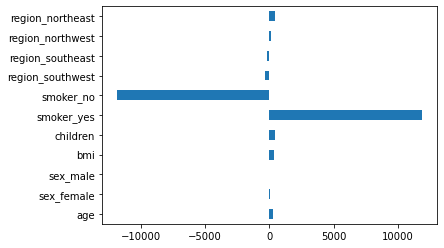

In [35]:
# Bar chart showing the coeffienct of the predicting variables.

feat_imp.plot(kind="barh")

### Observation
As we can see from the bar chart, it appears that smoking is the strongest determinant for insurance charges.
We will explore that later in the future.